In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
music = pd.read_csv('/content/Musical_instruments_reviews[1].csv')

In [3]:
music.shape

(10261, 9)

In [4]:
music .head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [5]:
music.isna().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [6]:
music['review_text'] = music['reviewText'].fillna('Missing')

In [7]:
music['reviews'] = music['reviewText'] + music['summary']

music = music.drop(['reviewText', 'summary'], axis = 1)

music.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,review_text,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,This pop filter is great. It looks and perform...


In [8]:
new = music["reviewTime"].str.split(",", n = 1, expand = True) 
  
# making separate date column
music["date"]= new[0] 
  
# making separate year column
music["year"]= new[1] 

music=music.drop(['reviewTime'], axis=1)
music.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,review_text,reviews,date,year
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...","Not much to write about here, but it does exac...",02 28,2014
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,The product does exactly as it should and is q...,03 16,2013
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,The primary job of this device is to block the...,08 28,2013
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Nice windscreen protects my MXL mic and preven...,02 14,2014
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,This pop filter is great. It looks and perform...,02 21,2014


In [9]:
new1 = music["date"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
music["month"]= new1[0] 
  
# adding day to the main dataset 
music["day"]= new1[1] 

music=music.drop(['date'], axis=1)
music.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,review_text,reviews,year,month,day
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...","Not much to write about here, but it does exac...",2014,02,28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,The product does exactly as it should and is q...,2013,03,16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,The primary job of this device is to block the...,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Nice windscreen protects my MXL mic and preven...,2014,02,14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,This pop filter is great. It looks and perform...,2014,02,21


In [10]:
new1 = music["helpful"].str.split(",", n = 1, expand = True)
new2 = new1[0].str.split("[", n = 1, expand = True)
new3 = new1[1].str.split("]", n = 1, expand = True)

#Resetting
new2.reset_index(drop=True, inplace=True)
new3.reset_index(drop=True, inplace=True)

#Dropping empty columns
new2=new2.drop([0], axis=1)
new3=new3.drop([1], axis=1)

#Concatenating the splitted columns
helpful=pd.concat([new2, new3], axis=1)

In [11]:
helpful

,1,0
0,0,0
1,13,14
2,1,1
3,0,0
4,0,0
...,...,...
10256,0,0
10257,0,0
10258,0,0
10259,0,0


In [12]:
def trim_all_columns(df):
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

#Applying the function
helpful= trim_all_columns(helpful)

#Converting into integer types
helpful[0]=helpful[0].astype(str).astype(int)
helpful[1]=helpful[1].astype(str).astype(int)

try:
  helpful['result'] = helpful[1]/helpful[0]
except ZeroDivisionError:
  helpful['result']=0

#Filling the NaN values(created due to dividing) with 0
helpful['result'] = helpful['result'].fillna(0)

#Rounding of the results to two decimal places
helpful['result']=helpful['result'].round(2) 

#Attaching the results to a new column of the main dataframe
music['helpful_rate']=helpful['result']

#dropping the helpful column from main dataframe
review=music.drop(['helpful'], axis=1)

In [13]:
music['helpful_rate'].value_counts()

0.00    7215
1.00    2040
0.50     266
0.67     136
0.75     111
        ... 
0.56       1
0.15       1
0.13       1
0.43       1
0.69       1
Name: helpful_rate, Length: 65, dtype: int64

In [14]:
music=music.drop(['reviewerName','unixReviewTime'], axis=1)

clean_reviews=review.copy()

In [15]:
import re

In [16]:
def review_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [17]:
music['reviews'] = music['reviews'].apply(lambda x: review_cleaning(x))

In [18]:
music.head()

,reviewerID,asin,helpful,overall,review_text,reviews,year,month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,"Not much to write about here, but it does exac...",not much to write about here but it does exact...,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.0,The product does exactly as it should and is q...,the product does exactly as it should and is q...,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.0,The primary job of this device is to block the...,the primary job of this device is to block the...,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.0,Nice windscreen protects my MXL mic and preven...,nice windscreen protects my mxl mic and preven...,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.0,This pop filter is great. It looks and perform...,this pop filter is great it looks and performs...,2014,02,21,0.00


In [19]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each','we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other','and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above','what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't",'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before','into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from','about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such','his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs','me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it','at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under','over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [20]:
music['reviews'] = music['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
music.head()

,reviewerID,asin,helpful,overall,review_text,reviews,year,month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,"Not much to write about here, but it does exac...",not much write but exactly supposed filters po...,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.0,The product does exactly as it should and is q...,product exactly quite affordablei not realized...,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.0,The primary job of this device is to block the...,primary job device block breath would otherwis...,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.0,Nice windscreen protects my MXL mic and preven...,nice windscreen protects mxl mic prevents pops...,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.0,This pop filter is great. It looks and perform...,pop filter great looks performs like studio fi...,2014,02,21,0.00


In [21]:
afinn = pd.read_csv('/content/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [22]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [23]:
affin_scores = afinn.set_index('word')['value'].to_dict()

In [24]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affin_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [25]:
calculate_sentiment(text = 'good')

3

In [26]:
music['sentimentValue'] = music['reviews'].apply(calculate_sentiment)

In [27]:
music

,reviewerID,asin,helpful,overall,review_text,reviews,year,month,day,helpful_rate,sentimentValue
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,"Not much to write about here, but it does exac...",not much write but exactly supposed filters po...,2014,02,28,0.00,0
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.0,The product does exactly as it should and is q...,product exactly quite affordablei not realized...,2013,03,16,0.93,2
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.0,The primary job of this device is to block the...,primary job device block breath would otherwis...,2013,08,28,1.00,-1
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.0,Nice windscreen protects my MXL mic and preven...,nice windscreen protects mxl mic prevents pops...,2014,02,14,0.00,4
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.0,This pop filter is great. It looks and perform...,pop filter great looks performs like studio fi...,2014,02,21,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,"[0, 0]",5.0,"Great, just as expected. Thank to all.",great expected thank allfive stars,2014,07,20,0.00,5
10257,A1RPTVW5VEOSI,B00JBIVXGC,"[0, 0]",5.0,I've been thinking about trying the Nanoweb st...,ive thinking trying nanoweb strings but bit pu...,2014,07,2,0.00,25
10258,AWCJ12KBO5VII,B00JBIVXGC,"[0, 0]",4.0,I have tried coated strings in the past ( incl...,tried coated strings past including elixirs ne...,2014,07,22,0.00,11
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"[0, 0]",4.0,"Well, MADE by Elixir and DEVELOPED with Taylor...",well made elixir developed taylor guitars stri...,2014,07,1,0.00,16


In [28]:
music['wordCount'] = music['reviews'].str.split().apply(len)
music['wordCount']

0         25
1         55
2         48
3         22
4         21
        ... 
10256      5
10257    291
10258     58
10259    153
10260     61
Name: wordCount, Length: 10261, dtype: int64

In [29]:
music.sort_values(by='sentimentValue')

,reviewerID,asin,helpful,overall,review_text,reviews,year,month,day,helpful_rate,sentimentValue,wordCount
6758,A3FQ9WYUHG9CD,B001OLZYUU,"[0, 1]",4.0,This Fender Treated Polish Cloth; a soft ecru ...,fender treated polish cloth soft ecru colored ...,2013,12,4,0.00,-34,349
5678,A34WEXT7SIRFE4,B000ULAP4U,"[9, 14]",2.0,"These cans were decent, back when they were ju...",cans decent back bucks theyve inflated thats r...,2012,02,3,0.64,-30,105
4112,A3M9FH2OZKYF4D,B000A2HOB6,"[1, 2]",1.0,"Crikey, where to begin. Firstly, I hated the f...",crikey begin firstly hated fact package two st...,2013,06,23,0.50,-27,67
8812,A165EMA3YTIM6A,B004UJO41S,"[1, 11]",1.0,DOWNGRADE TO 1-O STAR AFTER RETURNING IT BACK ...,downgrade star returning back brookmays seller...,2012,01,3,0.09,-20,410
957,A8ANJNZAZQ6IQ,B0002D0COE,"[1, 1]",4.0,I thought I would throw my two-cents in about ...,thought would throw twocents new design effect...,2014,01,21,1.00,-15,340
...,...,...,...,...,...,...,...,...,...,...,...,...
8500,ADH0O8UVJOT10,B0043RZ9QQ,"[2, 2]",5.0,For those unfamiliar with Vox's amPlug product...,unfamiliar voxs amplug products things amazing...,2012,10,24,1.00,78,501
6576,A20JJ8634DG3FS,B001I8ITQA,"[10, 10]",5.0,"COMPARISONS: I have compared, side by side, th...",comparisons compared side side following pedal...,2013,08,21,1.00,98,1129
5973,A1LCG14GZJI5LO,B000Y7Q2C4,"[1, 1]",5.0,I love this capo. Let me tell you about my cap...,love capo let tell capo journey ive used every...,2014,05,30,1.00,106,637
8636,A35YS5ND3K5FN,B004ISK48S,"[74, 75]",5.0,ConstructionThis Amp certainly looks sharp. It...,constructionthis amp certainly looks sharp not...,2011,02,10,0.99,130,719


In [30]:
music[music['sentimentValue']==139]

,reviewerID,asin,helpful,overall,review_text,reviews,year,month,day,helpful_rate,sentimentValue,wordCount
412,A27L5L6I7OSV5B,B0002CZV82,"[142, 150]",2.0,"From Greg Abrams review, entitled ""For all but...",greg abrams review entitled but tone snobs rev...,2011,06,30,0.95,139,713


In [31]:
music['reviews'][412]

'greg abrams review entitled but tone snobs review down products pagealright want get good if somewhat basic distortion sound less deali strongly disagree find much better distortions less even near mark currently priced ative played guitar years like many people one first pedal purchases afterall everyone talks theyre available given music store nation hear famous musicians using plus actually pretty cheap snapped one like everyone else come find something popular doesnt always mean good see nickelback transformers movie franchise kardashian family etcso plugged didnt really care distortion harsh thin artificial sounding always noisy tried amps practic amp solid state fender frontman big amp tube halfstack not diverse basic sound not likeable ive read japanese made better sound newer made taiwan models but either way not great pedal mindbut like many newer players didnt know better time fast forward years ive bought sold literally dozens pedals whole world great tones found if keep ey

In [32]:
music['sentimentValue'].min()

-34

In [33]:
music[music['sentimentValue']==-34]

,reviewerID,asin,helpful,overall,review_text,reviews,year,month,day,helpful_rate,sentimentValue,wordCount
6758,A3FQ9WYUHG9CD,B001OLZYUU,"[0, 1]",4.0,This Fender Treated Polish Cloth; a soft ecru ...,fender treated polish cloth soft ecru colored ...,2013,12,4,0.0,-34,349


In [34]:
music['reviews'][6758]

'fender treated polish cloth soft ecru colored cloth cut scalloped edge around asimple product classic fender logo left upper quadrant cloth resealableplastic bag cloth came label read states size inchesby incheswell size measured actually inches inches wanted mention itbecause seen people get mighty upset things like no problem inch minor detail go lumber yard time look wontactually find actual theyve shrinking yearsi not sure cloth treated but not feel different untreatedgibson polishing cloths purchased also gave nose test thought might hintof whiff polish something nope no scent no whiffwhat find disconcerting warning product details section amazon web page isthe fourth bullet down california residents click proposition warning thewarning verbatim amazon kudos amazon posting warning californias proposition entitles california consumers special warnings products contain chemicals known state california cause cancer birth defects reproductive harm if products expose consumers chemica

In [35]:
music['sentimentValue'].describe()

count    10261.000000
mean         6.939285
std          8.041129
min        -34.000000
25%          2.000000
50%          6.000000
75%         10.000000
max        139.000000
Name: sentimentValue, dtype: float64

In [36]:
music[music['sentimentValue']<=0]

,reviewerID,asin,helpful,overall,review_text,reviews,year,month,day,helpful_rate,sentimentValue,wordCount
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,"Not much to write about here, but it does exac...",not much write but exactly supposed filters po...,2014,02,28,0.0,0,25
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.0,The primary job of this device is to block the...,primary job device block breath would otherwis...,2013,08,28,1.0,-1,48
7,AJNFQI3YR6XJ5,B00004Y2UT,"[0, 0]",3.0,I now use this cable to run from the output of...,use cable run output pedal chain input fender ...,2012,11,16,0.0,0,87
12,A2NIT6BKW11XJQ,B00005ML71,"[0, 0]",3.0,If you are not use to using a large sustaining...,if not use using large sustaining pedal playin...,2013,11,17,0.0,0,16
28,A2CCGGDGZ694CT,B000068NVI,"[1, 1]",4.0,The Hosa XLR cables are affordable and very he...,hosa xlr cables affordable heavily madei large...,2012,07,11,1.0,-2,29
...,...,...,...,...,...,...,...,...,...,...,...,...
10178,A768OB1LNE356,B00FXKIG5I,"[1, 2]",2.0,The larger ones sometimes have the neck snap s...,larger ones sometimes neck snap thought might ...,2014,03,22,0.5,-5,44
10181,AYTKUTAP0VA53,B00FXKIG5I,"[0, 0]",5.0,This thing is TINY and does not have the break...,thing tiny not breakable swivel head original ...,2014,02,9,0.0,0,12
10188,A3M1PLEYNDEYO8,B00GTSM8FW,"[0, 0]",5.0,"I own several capos, but this is the first wit...",several capos but first adjustable tension sev...,2014,04,29,0.0,-5,72
10222,A2FY8306QHI5LE,B00IZCSW3M,"[0, 0]",4.0,At about twice the price of their standard str...,twice price standard strings daddario nyxl str...,2014,06,21,0.0,0,40


In [37]:
music[music['sentimentValue']>=100]

,reviewerID,asin,helpful,overall,review_text,reviews,year,month,day,helpful_rate,sentimentValue,wordCount
412,A27L5L6I7OSV5B,B0002CZV82,"[142, 150]",2.0,"From Greg Abrams review, entitled ""For all but...",greg abrams review entitled but tone snobs rev...,2011,06,30,0.95,139,713
5973,A1LCG14GZJI5LO,B000Y7Q2C4,"[1, 1]",5.0,I love this capo. Let me tell you about my cap...,love capo let tell capo journey ive used every...,2014,05,30,1.00,106,637
8636,A35YS5ND3K5FN,B004ISK48S,"[74, 75]",5.0,ConstructionThis Amp certainly looks sharp. It...,constructionthis amp certainly looks sharp not...,2011,02,10,0.99,130,719


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentimentValue', ylabel='Density'>

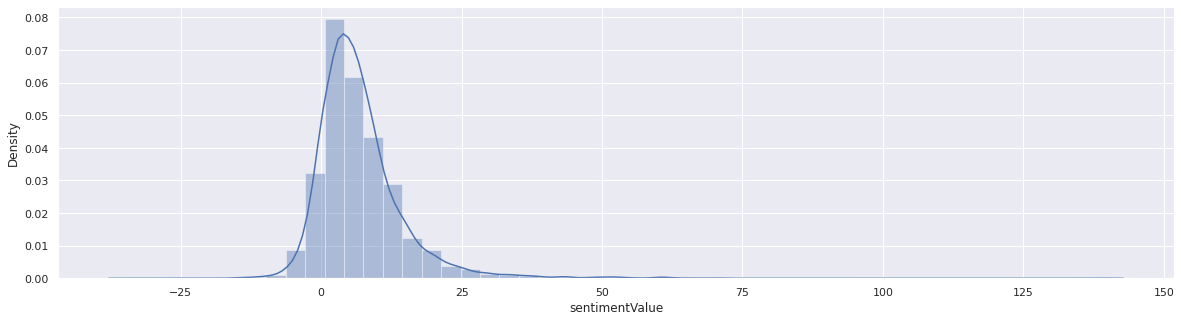

In [38]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(music['sentimentValue'])

In [39]:
music['index']=range(0,len(music))

<AxesSubplot:xlabel='index', ylabel='sentimentValue'>

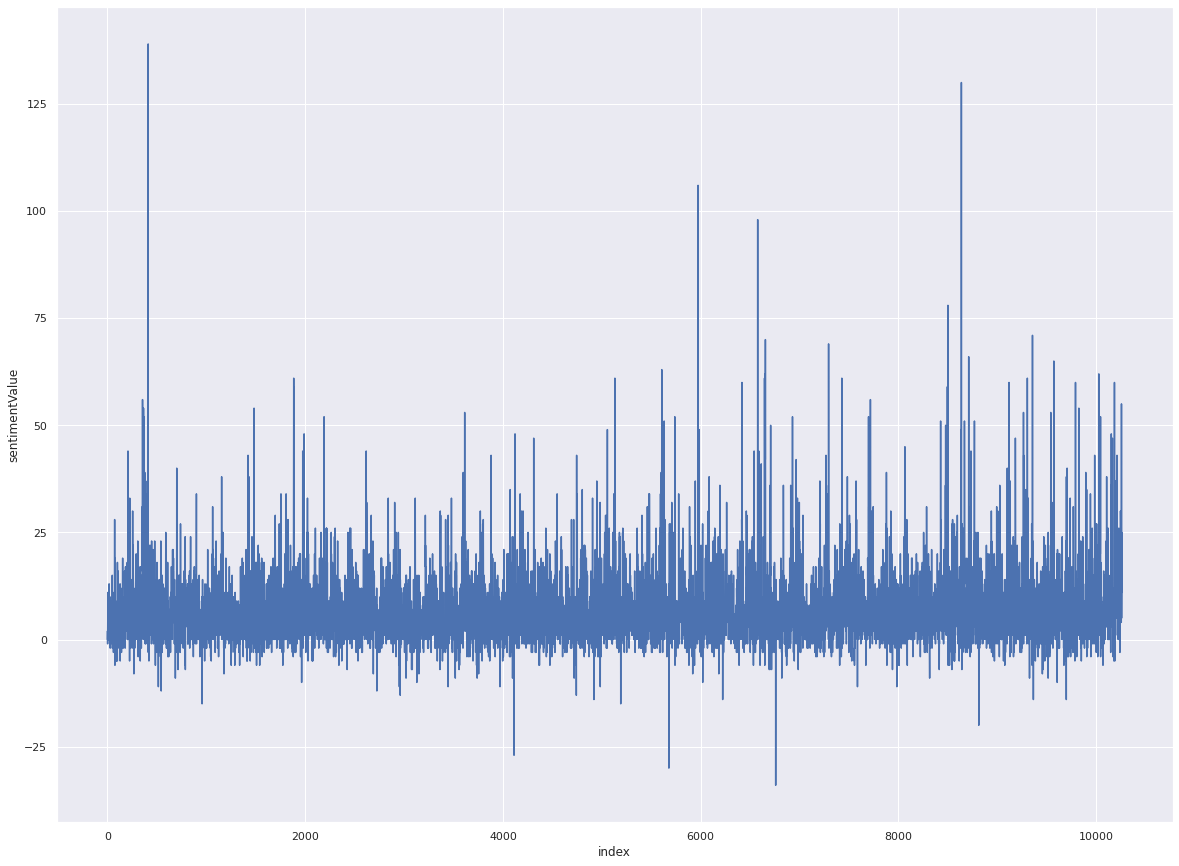

In [40]:
plt.figure(figsize=(20, 15))
sns.lineplot(y='sentimentValue',x='index',data=music)

<AxesSubplot:title={'center':'Sent sentiment value to sent word count'}, xlabel='wordCount', ylabel='sentimentValue'>

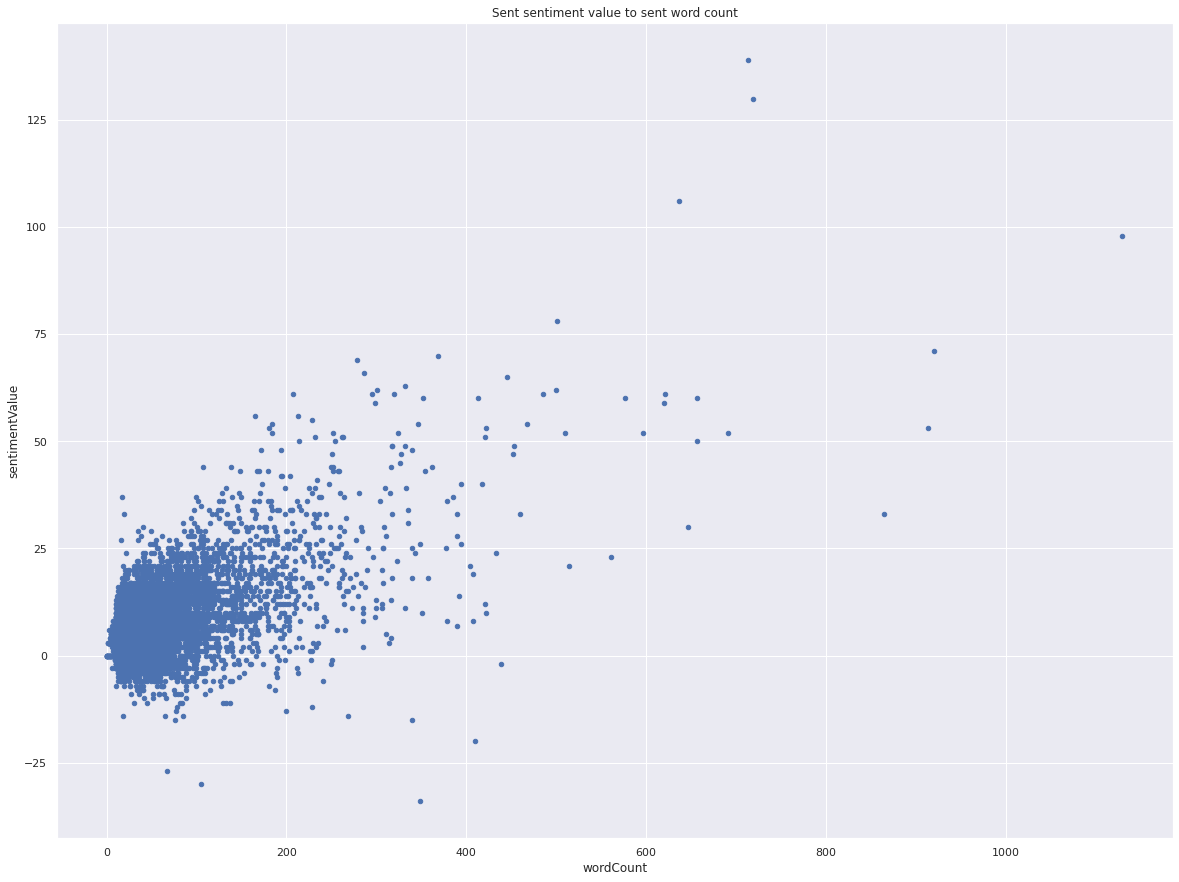

In [41]:
music.plot.scatter(x='wordCount', y='sentimentValue', figsize=(20,15), title='Sent sentiment value to sent word count')

In [42]:
def sentimentCat(row):
    
    '''This function returns sentiment category based on values in sentiment_value column'''
    
    if row['sentimentValue'] < 0:
        val = 'Negative'
    elif row['sentimentValue'] == 0: 
        val = 'Neutral'
    elif row['sentimentValue'] > 0:
        val = 'Positive'
    else:
        val = -1
    return val

In [43]:
music['sentimentCategory'] = music.apply(sentimentCat, axis=1)
music.head()

,reviewerID,asin,helpful,overall,review_text,reviews,year,month,day,helpful_rate,sentimentValue,wordCount,index,sentimentCategory
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,"Not much to write about here, but it does exac...",not much write but exactly supposed filters po...,2014,02,28,0.00,0,25,0,Neutral
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.0,The product does exactly as it should and is q...,product exactly quite affordablei not realized...,2013,03,16,0.93,2,55,1,Positive
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.0,The primary job of this device is to block the...,primary job device block breath would otherwis...,2013,08,28,1.00,-1,48,2,Negative
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.0,Nice windscreen protects my MXL mic and preven...,nice windscreen protects mxl mic prevents pops...,2014,02,14,0.00,4,22,3,Positive
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.0,This pop filter is great. It looks and perform...,pop filter great looks performs like studio fi...,2014,02,21,0.00,5,21,4,Positive


In [44]:
music['sentimentCategory'].value_counts()

Positive    8757
Negative     861
Neutral      643
Name: sentimentCategory, dtype: int64

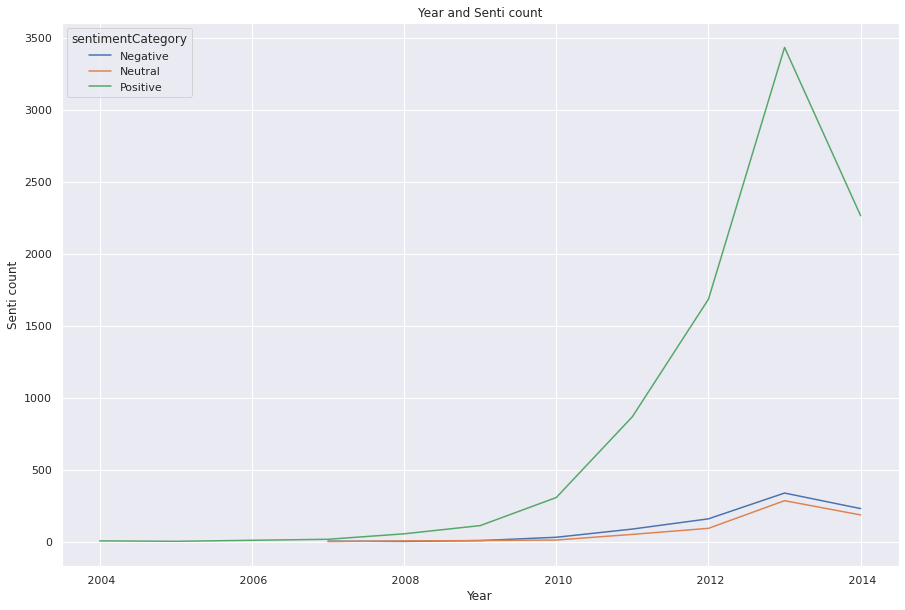

In [45]:
music.groupby(['year','sentimentCategory'])['sentimentCategory'].count().unstack().plot(figsize = (15,10),legend=True)
plt.title('Year and Senti count')
plt.xlabel('Year')
plt.ylabel('Senti count')
plt.show()

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

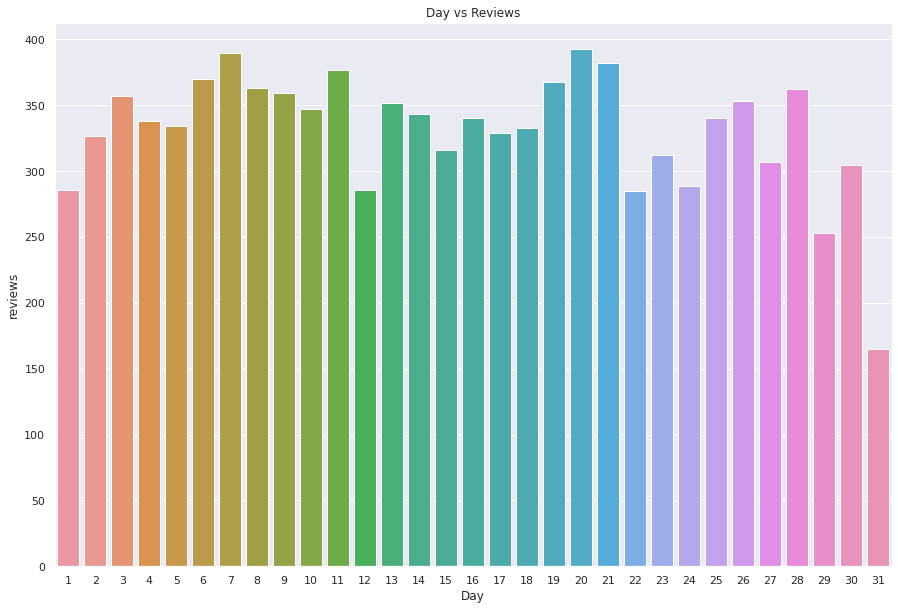

In [47]:
day=pd.DataFrame(music.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

sns.set(rc={'figure.figsize':(15, 10)})
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews')
plt.xlabel('Day')
plt.ylabel